# ***A Comparative Study of Machine Learning Algorithms for Complex Image Classification under Microscope with Limited Data***

Titles : A Comparative Study of Machine Learning Algorithms for Complex Image Classification under Microscope with Limited Data

Major field:	Machine learning

##Researcher


1.   Supawit Marayat
2.   Achirawit Prasom

##Schools

*   Princess Chulabhorn Science High School Chiang Rai, THAILAND

##Supervisor

1.   Satit Thamkhanta
2.   Manatchanok Tamwong





##Data set Info



###Data Source
Shenggan / BCCD_Dataset
https://github.com/Shenggan/BCCD_Dataset

###Data set : White blood cell types


1.   Neutrophil
2.   Eosinophil
2.   Lymphocyte
2.   List item




##Classification Algorithms

###Algorithms



1.   Support Vector Machines
  1.   Linear
  1.   RBF
  1.   Polynomial
2.   Naive Bayes
  1.   Gaussian
  1.   Multinomial
  1.   Bernoulli 
2.   Decision Tree
2.   Random Forest
2.   K-Nearest Neighbors
2.   Boosting
  1.   Ada Boosting
  2.   Gradient Boosting
  2.   Hist Gradient Boosting
  2.   eXtreme Gradient Boosting
  2.   light gradient-boosting machine
  2.   Cat Boost




#Data Preparation

##Install All requested files and library

###Kaggle and dataset install

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"supawitmarayat","key":"165c627c1f97710d69c68f66ac727204"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d paultimothymooney/blood-cells

 97% 105M/108M [00:00<00:00, 126MB/s] 
100% 108M/108M [00:00<00:00, 122MB/s]


In [ ]:
!unzip blood-cells.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8050.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8167.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8283.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8324.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8379.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8577.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8587.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8655.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8701.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_872.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8864.jpeg  
  inflating: dataset2-mast

In [ ]:
import os

root_folder = "dataset"
subfolders = ["EOSINOPHIL", "LYMPHOCYTE", "MONOCYTE", "NEUTROPHIL"]

if not os.path.exists(root_folder):
    os.makedirs(root_folder)
    
for subfolder in subfolders:
    path = os.path.join(root_folder, subfolder)
    if not os.path.exists(path):
        os.makedirs(path)

In [ ]:
import shutil

src_folder = 'dataset2-master/dataset2-master/images/'
dst_folder = 'dataset/'

path = ['TEST_SIMPLE', 'TRAIN']
classes = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

for p in path:
  mainPath = os.path.join(src_folder, p)
  for c in classes:
    src_folder_sub = os.path.join(mainPath, c)
    dst_folder_sub = os.path.join(dst_folder, c)

    for item in os.scandir(src_folder_sub):
      if item.is_file():
        shutil.move(item.path, dst_folder_sub,copy_function=shutil.copy2)

In [ ]:
folder_path = ['dataset-master','dataset2-master','sample_data']
for i in folder_path:
  shutil.rmtree(i)

In [ ]:
root_folder = ["src","result"]

for folder_name in root_folder:
  if not os.path.exists(folder_name):
      os.makedirs(folder_name)

shutil.move('blood-cells.zip',"src")
shutil.move('kaggle.json',"src")

'src/kaggle.json'

In [ ]:
""" %matplotlib notebook """

' %matplotlib notebook '

##Pre install requested librarys

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm, metrics, datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from skimage.io import imread
from skimage.transform import resize
import skimage

from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score

import pandas as pd

## Data preparation

### Load images in structured directory like it's sklearn sample dataset

In [ ]:
def load_image_files(container_path, dimension=(64, 64)):
    
    """
    Load image files with categories as subfolder names 
    which performs like scikit-learn sample dataset
    
    Parameters
    ----------
    container_path : string or unicode
        Path to the main folder holding one subfolder per category
    dimension : tuple
        size to which image are adjusted to
        
    Returns
    -------
    Bunch
    """
    
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        print('i is ', i)
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [ ]:
image_dataset = load_image_files("dataset/")

i is  0
i is  1
i is  2
i is  3


In [ ]:
#70:30

X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)

##Prep libs

In [ ]:
def roc_curve_plot(model,y_score, y_predict):
    plt.figure(figsize=(7.9,5.73))

    fpr, tpr, thresh, Auc = [],[],[],[]

    Macro = []
    Micro = []
    
    class_range = 4

    color_set = ["aqua", "darkorange", "cornflowerblue", "salmon"]

    lw = 1

    def get_roc_curve():
        for i in range(class_range):
            x, y, z = roc_curve(y_test, y_score[:, i], pos_label=i)
            fpr.append(x)
            tpr.append(y)
            thresh.append(z)

    def get_auc():
        for i in range(class_range):
            x = auc(fpr[i],tpr[i])
            y = float("{:.4f}".format(x))
            Auc.append(y)


    def plot_medium():
        random_probs = [0 for i in range(len(y_test))]
        p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
        plt.plot(p_fpr,p_tpr, linestyle='--', color='blue', lw=lw, label='Medium 0.5')


    def macro_plot():
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(class_range)]))
        mean_tpr = np.zeros_like(all_fpr)

        for i in range(class_range):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

        mean_tpr /= class_range

        Macro.append(all_fpr)
        Macro.append(mean_tpr)

        macro_auc = auc(Macro[0], Macro[1])
        Macro.append(macro_auc)

        plt.plot(
            Macro[0],
            Macro[1],
            color = 'navy',
            linestyle=":",
            linewidth=4,
            label = "macro & micro - average (area = {0:0.2f})".format(Macro[2]),
        )

    def plot_fpr_tpr():
        for i in range(class_range):
            plt.plot(
                fpr[i],
                tpr[i],
                color = color_set[i],
                label = 'ROC curve of class {} : {}'.format(i,Auc[i]),
                alpha=0.4,
            )

    get_roc_curve()
    get_auc()
    plot_fpr_tpr()
    macro_plot()
    plot_medium()


    plt.title('ROC curve of {}'.format(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc=4)
    plt.savefig("result/{}.png".format(model))
    files.download("result/{}.png".format(model))
    plt.show()
  

In [ ]:
from io import StringIO 
def report(model,pred,predproba):
  re = metrics.classification_report(y_test, pred)
  print("Classification report for - \n{}:\n{}\n".format(model, re))
  report_df = pd.read_csv(StringIO(re), sep='\t', index_col=0)
  report_df.to_csv('classification_report.csv', sep=',', index=True)

  print(roc_auc_score(y_test, predproba, multi_class='ovr', average="macro"))
  print(roc_auc_score(y_test, predproba, multi_class='ovr', average="weighted"))
  return re

In [ ]:
def bothreport(name,model,pred,predproba):
  report(model,pred,predproba)
  roc_curve_plot(name,predproba, pred)

#Support Vector Machines

##SVMs Series

###SVMs Linear

In [ ]:
svc_linear = svm.SVC(kernel='linear',C=0.1,gamma='auto',probability=True)
svc_linear.fit(X_train, y_train)

SVC(C=0.1, gamma='auto', kernel='linear', probability=True)

In [ ]:
svc_linear_predproba = svc_linear.predict_proba(X_test)
svc_linear_pred = svc_linear.predict(X_test)

Classification report for - 
SVC(C=0.1, gamma='auto', kernel='linear', probability=True):
              precision    recall  f1-score   support

           0       0.36      0.43      0.39       745
           1       0.48      0.47      0.47       754
           2       0.43      0.38      0.40       749
           3       0.50      0.47      0.49       761

    accuracy                           0.44      3009
   macro avg       0.44      0.44      0.44      3009
weighted avg       0.44      0.44      0.44      3009


0.7107899975482347
0.7111681002535132


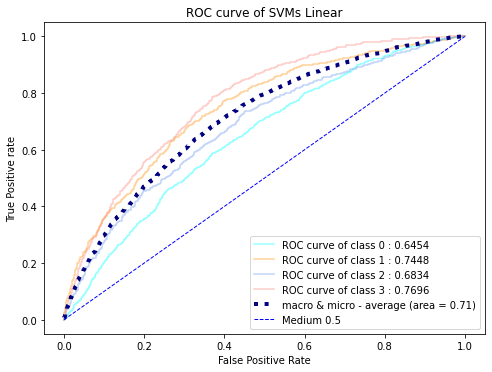

In [ ]:
''' report(svc_linear, svc_linear_pred, svc_linear_predproba)
roc_curve_plot("SVMs Linear",svc_linear_predproba,svc_linear_pred) '''
bothreport("SVMs Linear", svc_linear, svc_linear_pred, svc_linear_predproba)

###SVMs RBF

In [ ]:
svc_rbf = svm.SVC(kernel='rbf',C=1.e-02,gamma=1.e-01,probability=True)
svc_rbf.fit(X_train, y_train)

In [ ]:
svc_rbf_predproba = svc_rbf.predict_proba(X_test)
svc_rbf_pred = svc_rbf.predict(X_test)

In [ ]:
svc_rbf_pred = svc_rbf.predict(X_test)

In [ ]:
print(svc_rbf_predproba)
print(svc_rbf_pred)

[[0.25919353 0.24318027 0.25064878 0.24697742]
 [0.25919353 0.24318023 0.25064882 0.24697741]
 [0.25919353 0.24318024 0.25064882 0.24697741]
 ...
 [0.25919354 0.24318017 0.25064888 0.24697741]
 [0.25919352 0.24318027 0.25064875 0.24697745]
 [0.25919353 0.24318024 0.25064882 0.24697742]]
[0 0 0 ... 0 0 0]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

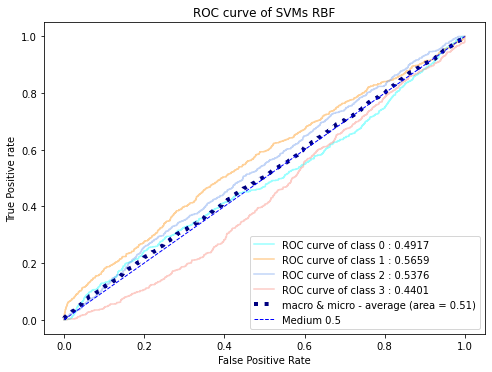

In [ ]:
''' bothreport("SVMs RBF", svc_rbf, svc_rbf_pred, svc_rbf_predproba) '''
roc_curve_plot("SVMs RBF",svc_rbf_predproba,svc_rbf_pred)

###SVMs Poly

In [ ]:
svc_poly = svm.SVC(kernel='poly',gamma=0.1,probability=True,degree=2,coef0=-100)
svc_poly.fit(X_train, y_train)

SVC(coef0=-100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [ ]:
svc_poly_predproba = svc_poly.predict_proba(X_test)
svc_poly_pred = svc_poly.predict(X_test)

Classification report for - 
SVC(coef0=-100, degree=2, gamma=0.1, kernel='poly', probability=True):
              precision    recall  f1-score   support

           0       0.28      0.43      0.34       745
           1       0.47      0.30      0.36       754
           2       0.29      0.38      0.33       749
           3       0.48      0.26      0.33       761

    accuracy                           0.34      3009
   macro avg       0.38      0.34      0.34      3009
weighted avg       0.38      0.34      0.34      3009


0.6381642239780776
0.6386714839106018


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

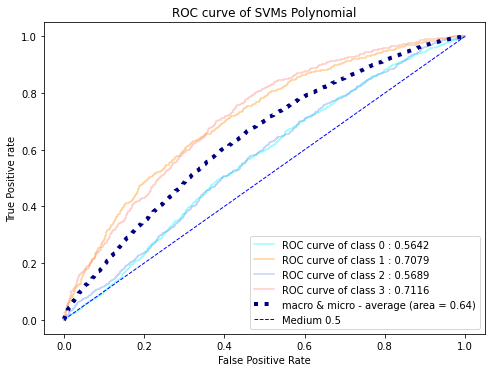

In [ ]:
bothreport("SVMs Polynomial", svc_poly, svc_poly_pred, svc_poly_predproba)

##KNN

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=4,metric='manhattan',)
KNN.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [ ]:
KNN_pred = KNN.predict(X_test)
KNN_predproba = KNN.predict_proba(X_test)

Classification report for - 
KNeighborsClassifier(metric='manhattan', n_neighbors=4):
              precision    recall  f1-score   support

           0       0.32      0.53      0.40       745
           1       0.49      0.49      0.49       754
           2       0.41      0.30      0.35       749
           3       0.58      0.35      0.44       761

    accuracy                           0.42      3009
   macro avg       0.45      0.42      0.42      3009
weighted avg       0.45      0.42      0.42      3009


0.671082042122548
0.6715253806354822


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

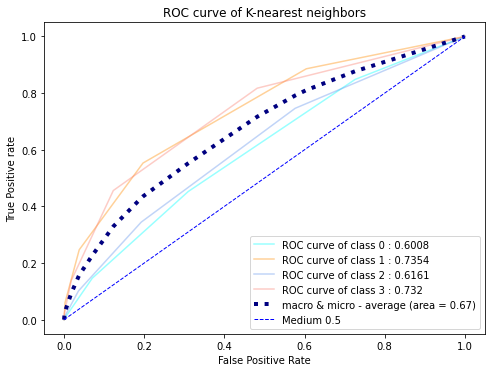

In [ ]:
bothreport("K-nearest neighbors",KNN,KNN_pred,KNN_predproba)

##Decision Tree

In [ ]:
Tree = tree.DecisionTreeClassifier(criterion='gini',max_features='sqrt',max_depth=13,min_samples_leaf=5,min_samples_split=3)
Tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=13, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=3)

In [ ]:
Tree_pred = Tree.predict(X_test)
Tree_predproba = Tree.predict_proba(X_test)

Classification report for - 
DecisionTreeClassifier(max_depth=13, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=3):
              precision    recall  f1-score   support

           0       0.34      0.46      0.39       745
           1       0.55      0.45      0.50       754
           2       0.34      0.42      0.38       749
           3       0.61      0.36      0.45       761

    accuracy                           0.42      3009
   macro avg       0.46      0.42      0.43      3009
weighted avg       0.46      0.42      0.43      3009


0.6590572580993916
0.6593244102162262


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

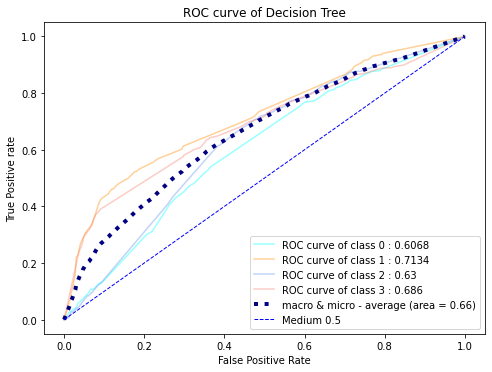

In [ ]:
bothreport("Decision Tree",Tree,Tree_pred,Tree_predproba)

##Random Forest

In [ ]:
RF = RandomForestClassifier(n_estimators=500,max_depth=8,max_features='auto',criterion='entropy')
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500)

In [ ]:
RF_pred = RF.predict(X_test)
RF_predproba = RF.predict_proba(X_test)

Classification report for - 
RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500):
              precision    recall  f1-score   support

           0       0.46      0.40      0.43       745
           1       0.73      0.75      0.74       754
           2       0.39      0.48      0.43       749
           3       0.69      0.60      0.64       761

    accuracy                           0.56      3009
   macro avg       0.57      0.56      0.56      3009
weighted avg       0.57      0.56      0.56      3009


0.8155199036397041
0.8158487726708084


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

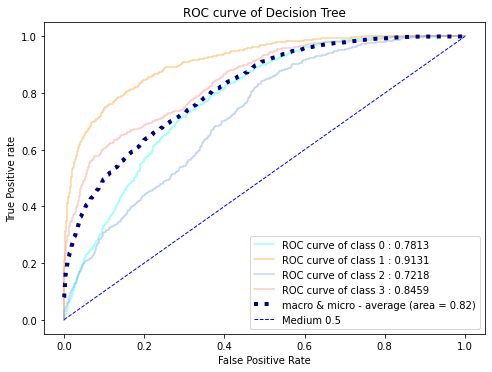

In [ ]:
bothreport("Decision Tree",RF,RF_pred,RF_predproba)

#NB

###GaussianNB

In [ ]:
gnb = GaussianNB(var_smoothing=0.0023)
gnb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.0023)

In [ ]:
gnb_pred = gnb.predict(X_test)
gnb_predproba = gnb.predict_proba(X_test)

Classification report for - 
GaussianNB(var_smoothing=0.0023):
              precision    recall  f1-score   support

           0       0.39      0.30      0.34       724
           1       0.49      0.51      0.50       752
           2       0.35      0.45      0.40       751
           3       0.35      0.33      0.34       782

    accuracy                           0.40      3009
   macro avg       0.40      0.39      0.39      3009
weighted avg       0.40      0.40      0.39      3009


0.639328449667772
0.6391720457092515


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

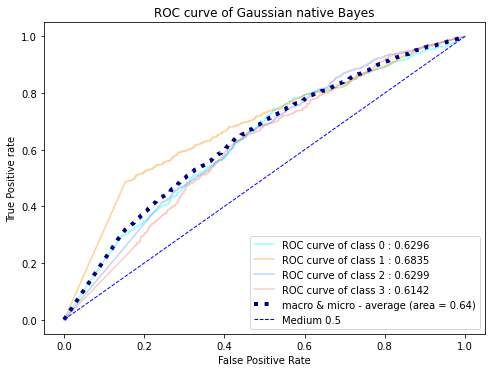

In [ ]:
bothreport("Gaussian native Bayes",gnb,gnb_pred,gnb_predproba)

###MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
mnb = MultinomialNB(alpha=1000,fit_prior=True)
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1000)

In [ ]:
mnb_pred = mnb.predict(X_test)
mnb_predproba = mnb.predict_proba(X_test)

Classification report for - 
MultinomialNB(alpha=1000):
              precision    recall  f1-score   support

           0       0.25      0.11      0.15       745
           1       0.29      0.17      0.21       754
           2       0.25      0.36      0.30       749
           3       0.26      0.39      0.31       761

    accuracy                           0.26      3009
   macro avg       0.26      0.26      0.24      3009
weighted avg       0.26      0.26      0.24      3009


0.5138681488580655
0.5139045648432948


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

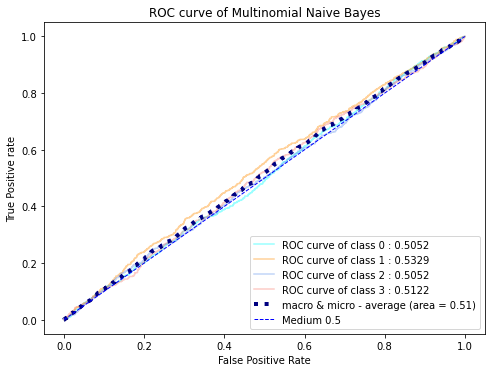

In [ ]:
bothreport("Multinomial Naive Bayes",mnb,mnb_pred,mnb_predproba)

###BernoulliNB

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(alpha=10,fit_prior=True)
bnb.fit(X_train, y_train)

BernoulliNB(alpha=10)

In [ ]:
bnb_pred = bnb.predict(X_test)
bnb_predproba = bnb.predict_proba(X_test)

Classification report for - 
BernoulliNB(alpha=10):
              precision    recall  f1-score   support

           0       0.26      0.19      0.22       745
           1       0.26      0.20      0.23       754
           2       0.26      0.27      0.26       749
           3       0.25      0.37      0.30       761

    accuracy                           0.26      3009
   macro avg       0.26      0.26      0.25      3009
weighted avg       0.26      0.26      0.25      3009


0.5060923630985106
0.506075792597567


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

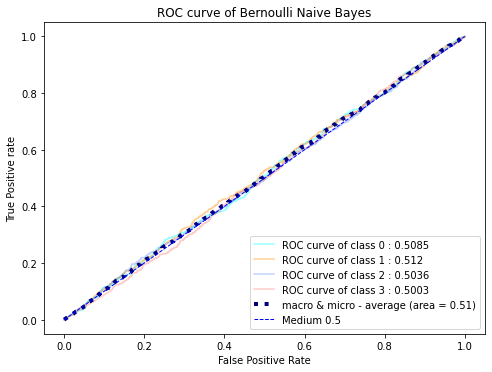

In [ ]:
bothreport("Bernoulli Naive Bayes",bnb,bnb_pred,bnb_predproba)

#Boosting

##Ada Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=94,learning_rate=0.5)
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=94)

In [ ]:
ada_pred = ada.predict(X_test)
ada_predproba = ada.predict_proba(X_test)

Classification report for - 
AdaBoostClassifier(learning_rate=0.5, n_estimators=94):
              precision    recall  f1-score   support

           0       0.37      0.45      0.41       745
           1       0.57      0.55      0.56       757
           2       0.64      0.53      0.58       738
           3       0.40      0.40      0.40       769

    accuracy                           0.48      3009
   macro avg       0.50      0.48      0.49      3009
weighted avg       0.49      0.48      0.49      3009


0.7319142139905197
0.7315451765850215


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

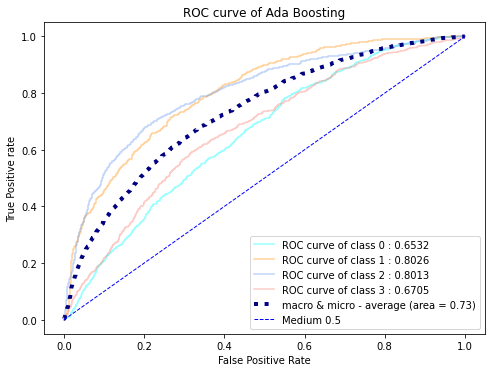

In [ ]:
bothreport("Ada Boosting",ada,ada_pred,ada_predproba)

##Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=94,learning_rate=0.5,max_depth=6)
GB.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=6, n_estimators=94)

In [ ]:
GB_pred = GB.predict(X_test)
GB_predproba = GB.predict_proba(X_test)

Classification report for - 
GradientBoostingClassifier(learning_rate=0.5, max_depth=6, n_estimators=94):
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       745
           1       0.79      0.81      0.80       757
           2       0.88      0.84      0.86       738
           3       0.64      0.63      0.63       769

    accuracy                           0.73      3009
   macro avg       0.74      0.74      0.74      3009
weighted avg       0.74      0.73      0.74      3009


0.9123111983914071
0.9119384327273858


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

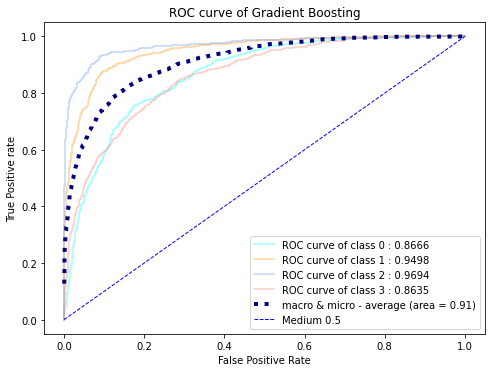

In [ ]:
bothreport("Gradient Boosting",GB,GB_pred,GB_predproba)

##Hist Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
hst = HistGradientBoostingClassifier(max_depth=2,learning_rate=0.01)
hst.fit(X_train, y_train)

HistGradientBoostingClassifier(learning_rate=0.01, max_depth=2)

In [ ]:
hst_pred = hst.predict(X_test)
hst_predproba = hst.predict_proba(X_test)

Classification report for - 
HistGradientBoostingClassifier(learning_rate=0.01, max_depth=2):
              precision    recall  f1-score   support

           0       0.56      0.52      0.54       724
           1       0.54      0.47      0.50       752
           2       0.40      0.48      0.43       751
           3       0.40      0.39      0.39       782

    accuracy                           0.46      3009
   macro avg       0.47      0.46      0.47      3009
weighted avg       0.47      0.46      0.47      3009


0.7253664967358492
0.7242508606632285


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

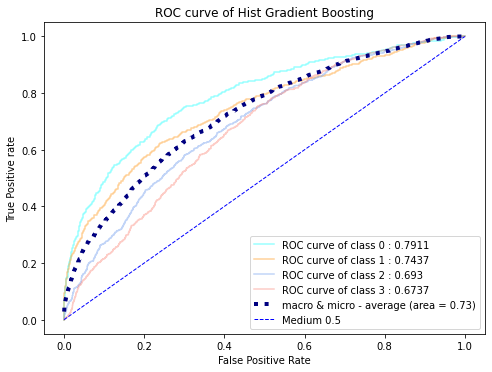

In [ ]:
bothreport("Hist Gradient Boosting",hst,hst_pred,hst_predproba)


##eXtreme Gradient Boosting

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier
Xgb = XGBClassifier(max_depth=4,learning_rate=0.2,n_estimators=300)
Xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.2, max_depth=4, n_estimators=300,
              objective='multi:softprob')

In [ ]:
Xgb_pred = Xgb.predict(X_test)
Xgb_predproba = Xgb.predict_proba(X_test)

Classification report for - 
XGBClassifier(learning_rate=0.2, max_depth=4, n_estimators=300,
              objective='multi:softprob'):
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       724
           1       0.81      0.81      0.81       752
           2       0.71      0.65      0.68       751
           3       0.65      0.72      0.68       782

    accuracy                           0.77      3009
   macro avg       0.77      0.77      0.77      3009
weighted avg       0.77      0.77      0.77      3009


0.935739140135567
0.9348114946625355


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

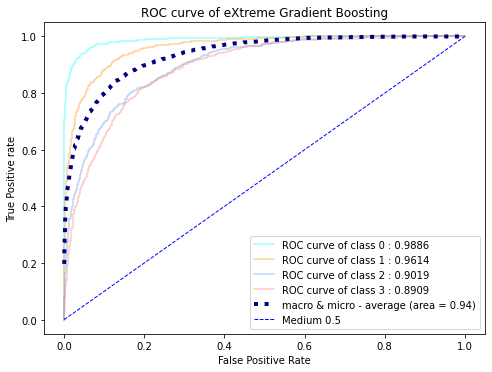

In [ ]:
bothreport("eXtreme Gradient Boosting",Xgb,Xgb_pred,Xgb_predproba)

##LightGMB

In [ ]:
from lightgbm import LGBMClassifier
LGBM = LGBMClassifier(subsample_for_bin=280000,sample=0.6,reg_lambda=0.5,reg_alpha=0.5,num_leaves=58,n_estimators=67,min_child_samples=20,learning_rate=0.1,is_unbalance=True,colsample_bytree=1,boosting_type='gbdt')
LGBM.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=1, is_unbalance=True, n_estimators=67,
               num_leaves=58, reg_alpha=0.5, reg_lambda=0.5, sample=0.6,
               subsample_for_bin=280000)

In [ ]:
LGBM_pred = LGBM.predict(X_test)
LGBM_predproba = LGBM.predict_proba(X_test)

Classification report for - 
LGBMClassifier(colsample_bytree=1, is_unbalance=True, n_estimators=67,
               num_leaves=58, reg_alpha=0.5, reg_lambda=0.5, sample=0.6,
               subsample_for_bin=280000):
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       724
           1       0.79      0.79      0.79       752
           2       0.64      0.61      0.63       751
           3       0.64      0.66      0.65       782

    accuracy                           0.74      3009
   macro avg       0.74      0.74      0.74      3009
weighted avg       0.74      0.74      0.74      3009


0.9198476243757369
0.918816546576073


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

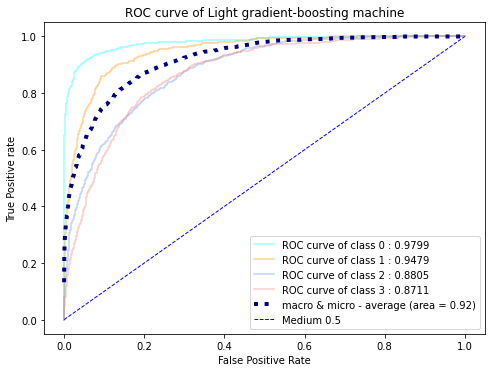

In [ ]:
bothreport("Light gradient-boosting machine",LGBM,LGBM_pred,LGBM_predproba)

##Cat Boosting

In [ ]:
!pip install CatBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import catboost

cat = catboost.CatBoostClassifier(learning_rate=0.87,l2_leaf_reg=6.4646464646464645,iterations=260,depth=8)
cat.fit(X_train, y_train)

0:	learn: 1.3165933	total: 22.6s	remaining: 1h 37m 25s
1:	learn: 1.2497702	total: 45.1s	remaining: 1h 36m 56s
2:	learn: 1.2126259	total: 1m 7s	remaining: 1h 36m 31s
3:	learn: 1.1919935	total: 1m 30s	remaining: 1h 36m 8s
4:	learn: 1.1566153	total: 1m 52s	remaining: 1h 35m 41s
5:	learn: 1.1243917	total: 2m 15s	remaining: 1h 35m 25s
6:	learn: 1.0910967	total: 2m 38s	remaining: 1h 35m 12s
7:	learn: 1.0617862	total: 3m 1s	remaining: 1h 35m 7s
8:	learn: 1.0316474	total: 3m 24s	remaining: 1h 34m 53s
9:	learn: 1.0083444	total: 3m 46s	remaining: 1h 34m 26s
10:	learn: 0.9834838	total: 4m 9s	remaining: 1h 33m 58s
11:	learn: 0.9534517	total: 4m 31s	remaining: 1h 33m 29s
12:	learn: 0.9156250	total: 4m 54s	remaining: 1h 33m 8s
13:	learn: 0.8865322	total: 5m 16s	remaining: 1h 32m 42s
14:	learn: 0.8636050	total: 5m 38s	remaining: 1h 32m 16s
15:	learn: 0.8425046	total: 6m 1s	remaining: 1h 31m 50s
16:	learn: 0.8150651	total: 6m 23s	remaining: 1h 31m 28s
17:	learn: 0.7938179	total: 6m 46s	remaining: 1h 3

In [ ]:
cat_pred = cat.predict(X_test)
cat_predproba = cat.predict_proba(X_test)

Classification report for - 
<catboost.core.CatBoostClassifier object at 0x7fec7ef1d850>:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       724
           1       0.71      0.70      0.71       752
           2       0.56      0.57      0.56       751
           3       0.58      0.56      0.57       782

    accuracy                           0.66      3009
   macro avg       0.66      0.66      0.66      3009
weighted avg       0.66      0.66      0.66      3009


0.8759817163011719
0.8746326567208342


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

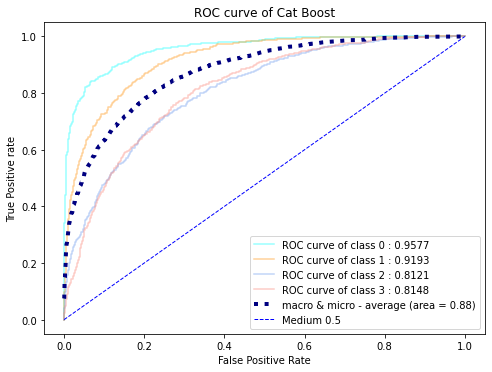

In [ ]:
bothreport("Cat Boost",cat,cat_pred,cat_predproba)